In [185]:
import torch
import matplotlib.pyplot as plt

In [263]:
def differentiable_circle(x, y, center, radius, alpha = 100):
    
    distance = torch.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
    return torch.sigmoid(-alpha * (distance - radius))

# Crear una cuadrícula de puntos

x, y = torch.meshgrid(torch.linspace(-1, 1, 100), torch.linspace(-1, 1, 100))

center = torch.tensor([0.0, 0.0], requires_grad = True)  
radius = torch.tensor(0.5, requires_grad = True)   

center2 = torch.tensor([0.5, 0.0], requires_grad = True)  
radius2 = torch.tensor(0.3, requires_grad = True)

# Imagen de círculo con bordes suaves

circle_image = differentiable_circle(x, y, center, radius)
circle_image2 = differentiable_circle(x, y, center2, radius2)

image = circle_image + circle_image2
image = torch.sigmoid(image)
image.sum().backward()

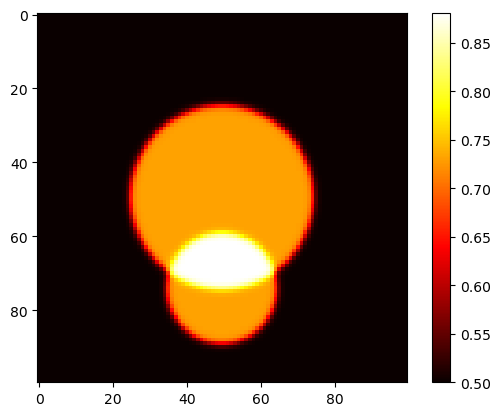

In [264]:
plt.imshow(image.detach().numpy(), cmap = "hot")
plt.colorbar()

In [265]:
def differentiable_rectangle(x, y, bottom_left, top_right, alpha=100):
    
    left = torch.sigmoid(alpha * (x - bottom_left[0]))
    right = torch.sigmoid(alpha * (top_right[0] - x))
    bottom = torch.sigmoid(alpha * (y - bottom_left[1]))
    top = torch.sigmoid(alpha * (top_right[1] - y))

    return left * right * bottom * top

# Crear una cuadrícula de puntos
x, y = torch.meshgrid(torch.linspace(-1, 1, 100), torch.linspace(-1, 1, 100))
bottom_left = torch.tensor([-0.5, -0.5], requires_grad=True)  # Esquina inferior izquierda
top_right = torch.tensor([0.5, 0.5], requires_grad=True)      # Esquina superior derecha

# Imagen de rectángulo con bordes suaves
rectangle_image = differentiable_rectangle(x, y, bottom_left, top_right)
rectangle_image.sum().backward()  # Calcula gradiente

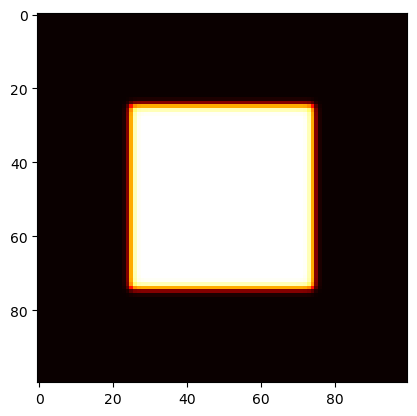

In [266]:
plt.imshow(rectangle_image.detach().numpy(), cmap = "hot")